In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


#Importing of Required Libraries/Modules

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize 
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
import warnings 
from sklearn import datasets, linear_model
import re
from keras.layers.recurrent import LSTM
from keras.layers.embeddings import Embedding
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import chardet
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve 
import seaborn as sns

warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

import nltk
nltk.download('punkt')

Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
allurlcsv = pd.read_csv("dataset.csv")
allurlsdata = pd.DataFrame(allurlcsv)

In [ ]:
allurlsdata.replace(('benign', 'malicious'), (1, 0), inplace=True)
urls= allurlsdata['url']
urls= urls
labels = allurlsdata['label']
labels=labels

#Tokenization

In [ ]:
NewdataSet=[]
inc=0
for i in urls:
  temp = re.split(r'[./#=$]', urls[inc])
  NewdataSet.append(temp)
  inc=inc+1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(NewdataSet, labels, test_size=0.45)
print (np.array(X_train).shape, np.array(y_train).shape)

(114792,) (114792,)


#Word2Vec

In [ ]:
modelvector = gensim.models.Word2Vec(X_train, min_count = 1, size = 10, window = 5, sg = 1)
modelvectortest = gensim.models.Word2Vec(X_test, min_count = 1, size = 10, window = 5, sg = 1)

In [ ]:
pretrained_weights = modelvector.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape
print('Result embedding shape:', pretrained_weights.shape)

def word2idx(word):
  return modelvector.wv.vocab[word].index
def idx2word(idx):
  return modelvector.wv.index2word[idx]

Result embedding shape: (162965, 10)


In [ ]:
pretrained_weights_test = modelvectortest.wv.syn0
vocab_size_test, emdedding_size_test = pretrained_weights_test.shape
print('Result embedding shape:', pretrained_weights_test.shape)

def word2idx_test(word):
  return modelvectortest.wv.vocab[word].index
def idx2word_test(idx):
  return modelvectortest.wv.index2word[idx]

Result embedding shape: (136973, 10)


In [ ]:
col=len(max(NewdataSet,key=len))
row=len(X_train)
print (col)
trainXf = np.zeros([len(X_train), col], dtype=np.int32)
train_y = np.zeros([len(y_train)], dtype=np.int32)

testXf = np.zeros([len(X_test), col], dtype=np.int32)
test_y = np.zeros([len(y_test)], dtype=np.int32)

for sublist in range(len(X_train)): 
    for val in range(len(X_train[sublist])):
     trainXf[sublist][val]=word2idx(X_train[sublist][val]) 

for sublist in range(len(X_test)): 
    for val in range(len(X_test[sublist])):
     testXf[sublist][val]=word2idx_test(X_test[sublist][val]) 

33


In [ ]:
print (y_train.dtype)
print (y_test.dtype)
print (testXf)

int64
int64
[[     0     58  18363 ...      0      0      0]
 [     0  18364  18365 ...      0      0      0]
 [ 18366    600   5564 ...      0      0      0]
 ...
 [     0    130    127 ...      0      0      0]
 [     0 136969 136970 ...      0      0      0]
 [136971 136972      1 ...      0      0      0]]


#1. LSTM 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emdedding_size, 
                    weights=[pretrained_weights]))
model.add(Dropout(0.2))
model.add(LSTM(units=emdedding_size))
model.add(Dropout(0.2))

model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 10)          1629650   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 10)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 44        
_________________________________________________________________
dense_2 (De

In [ ]:
# fit the model
model.fit(np.array(trainXf),np.array(y_train), epochs=2, verbose=1,validation_split=0.8)


Train on 22958 samples, validate on 91834 samples
Epoch 1/2
22958/22958 [==============================] - 38s 2ms/step - loss: 0.5357 - accuracy: 0.6448 - val_loss: 0.0440 - val_accuracy: 0.9926
Epoch 2/2
22958/22958 [==============================] - 42s 2ms/step - loss: 0.0574 - accuracy: 0.9899 - val_loss: 0.0399 - val_accuracy: 0.9930


In [ ]:
count0=0
count1=0
for i in y_test:
  if i ==0:
    count0+=1
  if i==1:
    count1+=1

print (count0," ",count1," ",len(y_test))
print (len(testXf))
print (testXf)

47018   46903   93921
93921
[[     0     58  18363 ...      0      0      0]
 [     0  18364  18365 ...      0      0      0]
 [ 18366    600   5564 ...      0      0      0]
 ...
 [     0    130    127 ...      0      0      0]
 [     0 136969 136970 ...      0      0      0]
 [136971 136972      1 ...      0      0      0]]


In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(np.array(testXf) , np.array(y_test), verbose=0)
print('Accuracy: %f' % (accuracy*100))
print ('loss of' , loss)

Accuracy: 99.293023
loss of 0.04072936664571897


In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(testXf, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testXf, verbose=0)

In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,cohen_kappa_score,f1_score,recall_score,precision_score,accuracy_score

#Results of LSTM

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)


Accuracy: 0.992930
Precision: 0.992627
Recall: 0.993220
F1 score: 0.992924
Cohens kappa: 0.985860
ROC AUC: 0.993128


#ROC Curve for LSTM

Abnormal: ROC AUC=0.500
Normal: ROC AUC=0.993


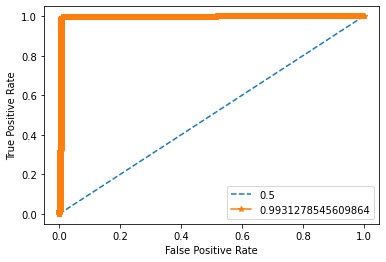

In [ ]:
ns_probs=[0 for _ in range(len(y_test))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, yhat_probs)

# summarize scores
print('Abnormal: ROC AUC=%.3f' % (ns_auc))
print('Normal: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, yhat_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label=ns_auc)
plt.plot(lr_fpr, lr_tpr, marker='*', label=lr_auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#Confusion Matrix for LSTM

In [ ]:
# confusion matrix
cf_matrix = confusion_matrix(y_test, yhat_classes)
print(cf_matrix)
df_cm = pd.DataFrame(cf_matrix, 
  index = [ 'Malicious', 'Benign'],
  columns = ['Malicious', 'Benign'])

[[46672   346]
 [  318 46585]]


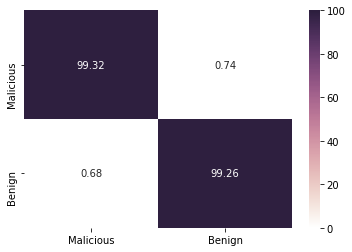

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(df_cm/np.sum(df_cm)*100, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

#2. Random Forest

In [ ]:
# random forest model creation
rfc1 = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=10)
rfc1.fit(trainXf,y_train)

# predictions
rfc_predict = rfc1.predict(testXf)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

(208713, 22)
=== Confusion Matrix ===
[[34246   178]
 [  842 33610]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     34424
           1       0.99      0.98      0.99     34452

    accuracy                           0.99     68876
   macro avg       0.99      0.99      0.99     68876
weighted avg       0.99      0.99      0.99     68876



=== All AUC Scores ===
[0.99015798 0.99995148 0.99985305 0.99999933 0.99990219 1.
 0.99977604 0.99557389 0.97502321 0.96715957]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9927396745326386


#Classification Report for RF

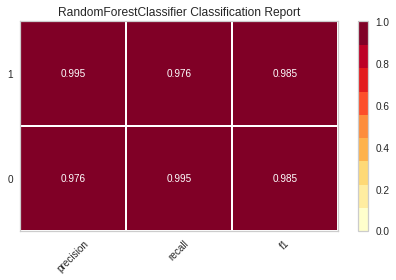

In [ ]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(rfc1, classes=['0','1'])
visualizer.fit(trainXf,y_train) # Fit the training data to the visualizer
visualizer.score(testXf, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

#ROC Curve for RF

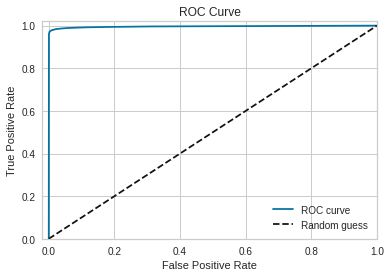

In [ ]:
%matplotlib inline

y_pred_prob = rfc1.predict_proba(testXf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

#Precision-Recall Curve for RF

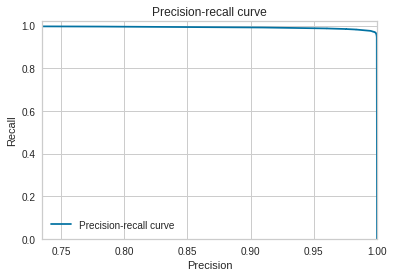

In [ ]:

from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

#Confusion Matrix for RF

Confusion matrix
[[0.99465489 0.00534511]
 [0.02449785 0.97550215]]


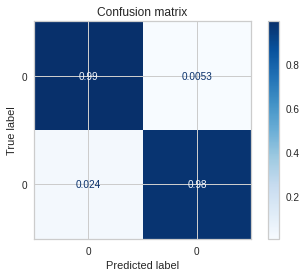

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
                  ("Confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rfc1, testXf, y_test,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#3. Multilayer Perceptron

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaler.fit(trainXf)
trainXf = scaler.transform(trainXf)
testXf = scaler.transform(testXf)

mlp = MLPClassifier(hidden_layer_sizes=(2, 2, 2), max_iter=10)
mlp.fit(trainXf,y_train)

predictions = mlp.predict(testXf)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test,predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,predictions))

=== Confusion Matrix ===
[[20852   130]
 [  627 20134]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20982
           1       0.99      0.97      0.98     20761

    accuracy                           0.98     41743
   macro avg       0.98      0.98      0.98     41743
weighted avg       0.98      0.98      0.98     41743



#Classification Report for MLP

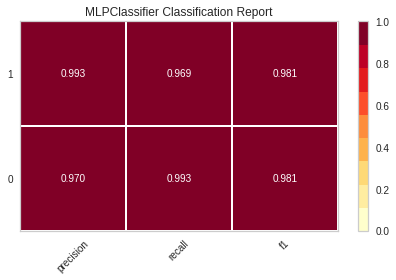

In [ ]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(mlp, classes=['0','1'])
visualizer.fit(trainXf, y_train) # Fit the training data to the visualizer
visualizer.score(testXf, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

#ROC Curve for MLP

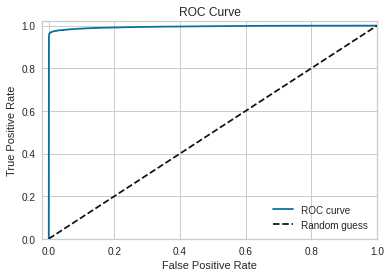

In [ ]:
%matplotlib inline

y_pred_prob = mlp.predict_proba(testXf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

#Precision-Recall Curve for MLP

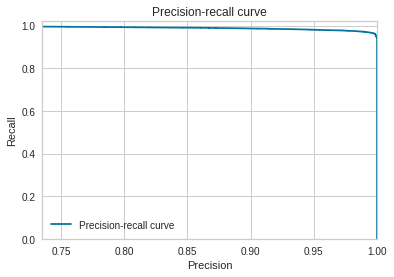

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

#Confusion Matrix for MLP

Confusion matrix
[[0.99318463 0.00681537]
 [0.03106787 0.96893213]]


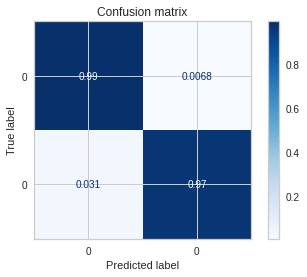

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
                  ("Confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(mlp, testXf, y_test,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#4. Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(trainXf, y_train)
y_pred = nb.predict(testXf)

print(accuracy_score(y_test, y_pred))

0.9546267607883221


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[31004   293]
 [ 2548 28769]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     31297
           1       0.99      0.92      0.95     31317

    accuracy                           0.95     62614
   macro avg       0.96      0.95      0.95     62614
weighted avg       0.96      0.95      0.95     62614



#Classification Report for NB

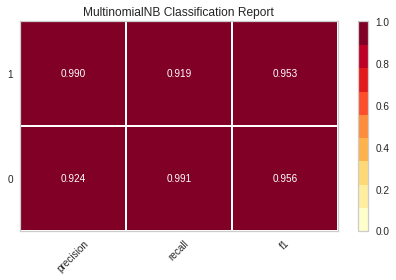

In [ ]:
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(nb, classes=['0','1'])
visualizer.fit(trainXf, train_y) # Fit the training data to the visualizer
visualizer.score(testXf, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

#ROC Curve for NB

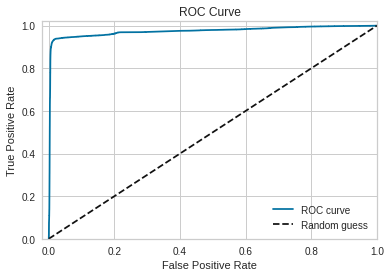

In [ ]:
%matplotlib inline

y_pred_prob = nb.predict_proba(testXf)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

#Precision-Recall Curve for NB

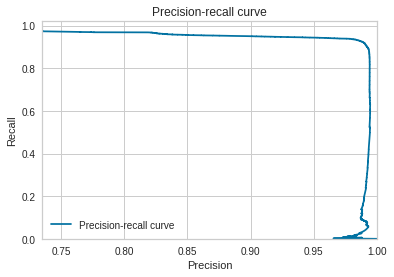

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.xlim([0.735, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower left")

# save figure
plt.savefig('precision_recall.png', dpi=200)

In [ ]:
average_precision_score(y_test, y_pred_prob)

0.9776369775154395

#Confusion Matrix for NB

Confusion matrix
[[0.99063808 0.00936192]
 [0.08136156 0.91863844]]


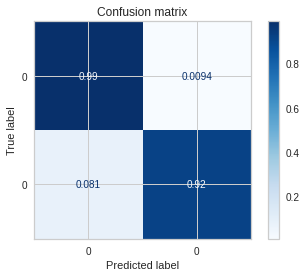

In [ ]:
# Plot non-normalized confusion matrix
titles_options = [
                  ("Confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(nb, testXf, y_test,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()